In [182]:
import requests
import csv
import matplotlib.pyplot as plt
from dateutil.parser import parse

In [183]:
url = "https://www.data.gouv.fr/fr/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7"
download = requests.get(url)
dep, jour, rad = [],[],[]
brut = download.content.decode('utf-8')
lignes = brut.split('\n')
tab = []
for ligne in lignes[1:-1:3] :
    champs = ligne.split(';')
    dep.append(champs[0].strip('"'))
    jour.append(parse(champs[2].strip('"')))
    rad.append(int(champs[3]))

In [184]:
tab = zip(rad,jour,dep)
dates , rad = [],[]
for r in tab :
    if r[2]=='17' :
        rad.append(r[0])
        dates.append(r[1].strftime("%d/%m"))

(array([-15.,   0.,  15.,  30.,  45.,  60.,  75.,  90., 105., 120., 135.,
        150.]),
 <a list of 12 Text major ticklabel objects>)

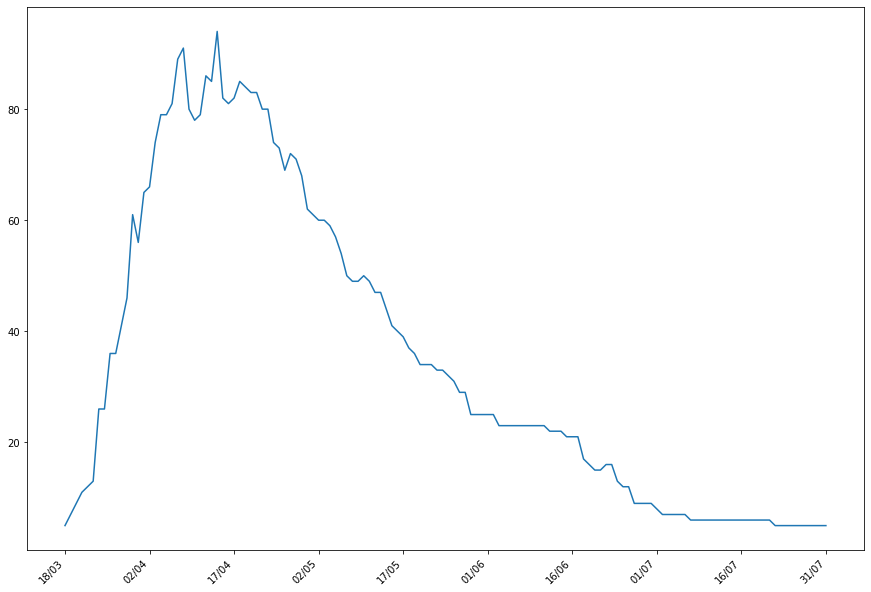

In [185]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(dates,rad)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=45, horizontalalignment="right")